## ModelComparisons: Logistic Regression, Random Forest, XGBoost, LightGBM, and Deep Learning Keras Models

In [1]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('instacart_pca.csv')
df.head()

,order_id,product_id,aisle_id,orders,order_number,days_reorder_ratio,days_since_prior_order,n_orders,order_hour_of_day,reorder_interval,total_items,reordered
0,1,0.0,0.0,0.0,4,9.000000,0.0,0.0,0.0,1.000000,0.0,1.0
1,1,1.0,1.0,76.0,4,0.473684,0.0,10.0,0.0,19.000000,11.0,1.0
2,1,2.0,2.0,4.0,4,0.552632,0.0,14.0,0.0,16.285714,31.0,0.0
3,1,3.0,2.0,6.0,4,0.750000,0.0,12.0,0.0,12.000000,0.0,0.0
4,1,4.0,3.0,22.0,4,0.529412,0.0,5.0,0.0,17.000000,0.0,1.0


In [3]:
df.shape

(1384617, 12)

In [4]:
X = df.drop(['reordered'], axis=1)
y = df['reordered']
(X.shape, y.shape)

((1384617, 11), (1384617,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y.values, test_size=0.3, random_state=42)
(X_train.shape, X_test.shape)

((969231, 11), (415386, 11))

In [7]:
lr = pickle.load(open('lrm_pca.pickle', 'rb'))
rf = pickle.load(open('rfm_pca.pickle', 'rb'))
xgb = pickle.load(open('xgbm_pca.pickle', 'rb'))
lgb = pickle.load(open('lgbm_pca.pickle', 'rb'))
dl = load_model('dlm_pca.h5')

In [8]:
lr_pred = lr.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
lgb_pred = lgb.predict(X_test)
dl_pred = dl.predict(X_test).ravel()

In [9]:
x_lr, y_lr, t_lr = roc_curve(y_test, lr_pred, pos_label=1)
x_rf, y_rf, t_rf = roc_curve(y_test, rf_pred, pos_label=1)
x_xgb, y_xgb, t_xgb = roc_curve(y_test, xgb_pred, pos_label=1)
x_lgb, y_lgb, t_lgb = roc_curve(y_test, lgb_pred, pos_label=1)
x_dl, y_dl, t_dl = roc_curve(y_test, dl_pred, pos_label=1)

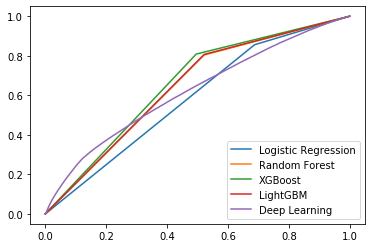

In [10]:
names  = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM', 'Deep Learning']

plt.plot(x_lr, y_lr)
plt.plot(x_rf, y_rf)
plt.plot(x_xgb, y_xgb)
plt.plot(x_lgb, y_lgb)
plt.plot(x_dl, y_dl)

plt.legend(names)
plt.show()